### Analisis Data Explorasion

In [1]:
pip install nltk seaborn scikit-learn gensim pyldavis wordcloud textblob spacy textstat



[notice] A new release of pip available: 22.3.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Untuk manipulasi data
import numpy as np
import pandas as pd

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk operasi string dan reguler ekspresi
import re
import string

# Untuk operasi matematika
import math

# Pemrosesan Bahasa Alami (NLP) dan analisis teks
import nltk
import spacy
import gensim
from wordcloud import WordCloud
from textblob import TextBlob

# Pembelajaran mesin dan analisis teks
import sklearn

# Visualisasi pemodelan topik
import pyLDAvis

# Statistik teks
import textstat


In [3]:
# Importing dataset
# Membaca JSON ke dalam DataFrame
df = pd.read_json('kompas_crawl_2024-03-01_to_2024-06-22.json')

In [4]:
# Menampilkan DataFrame
df.head()

,judul,tanggal,url,img,content,kelas,category
0,President University Resmi Angkat Prof. Satyan...,01/03/2024 21:04,https://www.kompas.com/edu/read/2024/03/01/210...,https://asset.kompas.com/crops/T7wZ1OgNBXdEY_D...,KOMPAS.com - President University secara resmi...,Edu,EDUKASI
1,"Cara Cek dan Link Pengumuman SNBP 2024, Diumum...",01/03/2024 20:37,https://www.kompas.com/edu/read/2024/03/01/203...,https://asset.kompas.com/crops/83mzfKOIwQ5iceA...,KOMPAS.com - Pendaftaran Seleksi Nasional Berd...,Edu,EDUKASI
2,Kemendikbud Luncurkan Program Percepatan Pemen...,01/03/2024 18:16,https://www.kompas.com/edu/read/2024/03/01/181...,https://asset.kompas.com/crops/IWhZ6NOeNc-ehTk...,KOMPAS.com - Balai Pembiayaan Pendidikan Tingg...,Edu,EDUKASI
3,Bantuan Rp 140 Juta bagi Komunitas Sastra dari...,01/03/2024 17:50,https://www.kompas.com/edu/read/2024/03/01/175...,https://asset.kompas.com/crops/t4QtF_F_Bzd9zCm...,"KOMPAS.com - Kementerian Pendidikan, Kebudayaa...",Edu,EDUKASI
4,4 Hal Penyebab Gagal Seleksi Administrasi Beas...,01/03/2024 17:22,https://www.kompas.com/edu/read/2024/03/01/172...,https://asset.kompas.com/crops/AxHwaNxH2JykVIg...,KOMPAS.com - Hasil seleksi administrasi Beasis...,Edu,EDUKASI


In [5]:
# Menampilkan informasi Ukuran data
print("Shape of data=>",df.shape)

Shape of data=> (500, 7)


In [6]:
# apakah ada nilai null di dataset
df.isnull().sum()

judul       0
tanggal     0
url         0
img         0
content     0
kelas       0
category    0
dtype: int64

In [7]:
# Mengecek apakah ada data yang duplikat di data ini
df.duplicated(subset=['judul']).any()

False

Text(0.5, 1.0, 'Distribusi Panjang Judul')

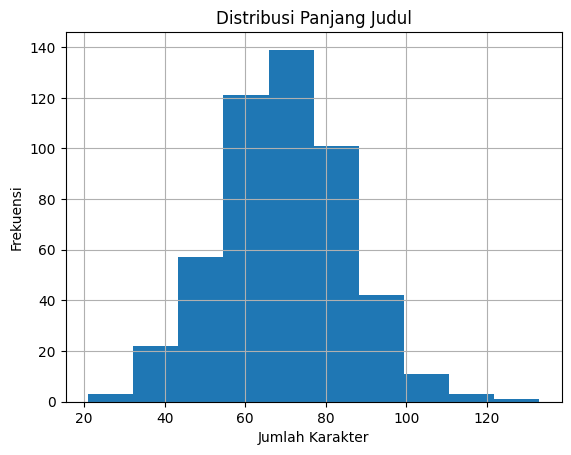

In [8]:
# melihat jumlah karakter yang ada di setiap kalimat. Hal ini dapat memberi kita gambaran kasar tentang panjang judul berita.
df['judul'].str.len().hist()
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Judul')

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SITI NUR
[nltk_data]     AINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Text(0.5, 1.0, 'Top 10 frekuensi Stopwords')

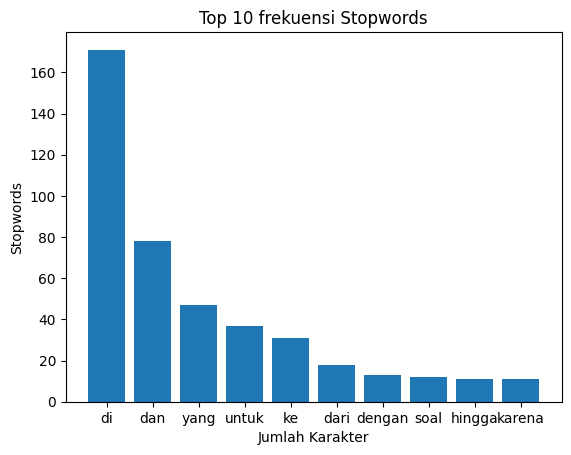

In [10]:
# Stopword paling banyak di Judul
from nltk.corpus import stopwords
stop= set(stopwords.words('indonesian'))
corpus=[]
new= df['judul'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.xlabel('Jumlah Karakter')
plt.ylabel('Stopwords')
plt.title('Top 10 frekuensi Stopwords')

Text(0.5, 1.0, 'Kata selain stopword yang sering muncul')

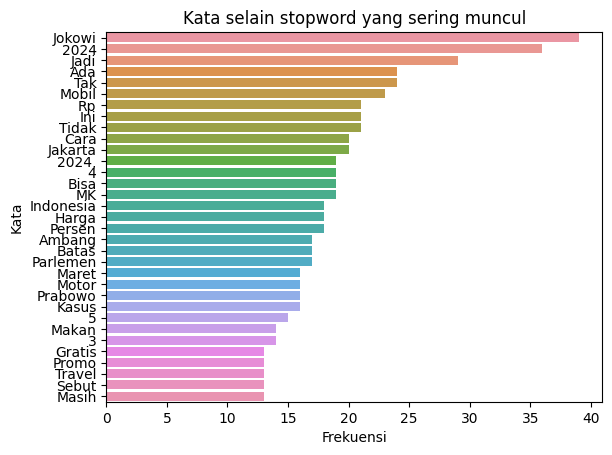

In [11]:
# kata-kata selain stopwords yang sering muncul
from collections import Counter
def plot_top_non_stopwords_barchart(text):
    stop= set(stopwords.words('indonesian'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []

    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)


    sns.barplot(x=y,y=x)
plot_top_non_stopwords_barchart(df['judul'])
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Kata selain stopword yang sering muncul')

Text(0.5, 1.0, 'Kata bigram yang sering muncul')

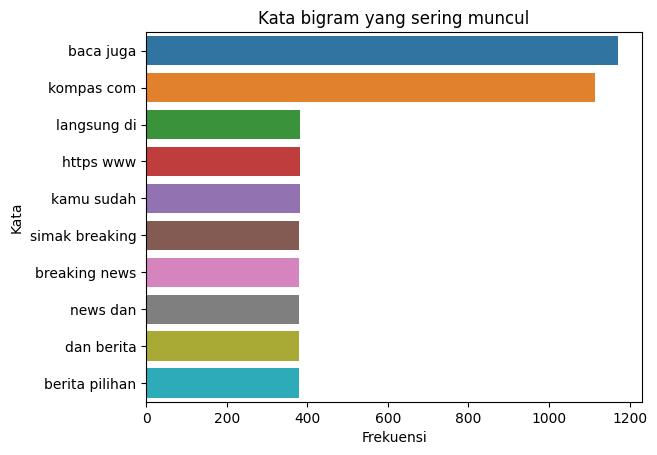

In [12]:
# cek n-gram frekuensi untuk bigram atau 2 kata
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('indonesian'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None, top_n=10):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
plot_top_ngrams_barchart(df['content'],2)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Kata bigram yang sering muncul')

Text(0.5, 1.0, 'Kata Trigram yang sering muncul')

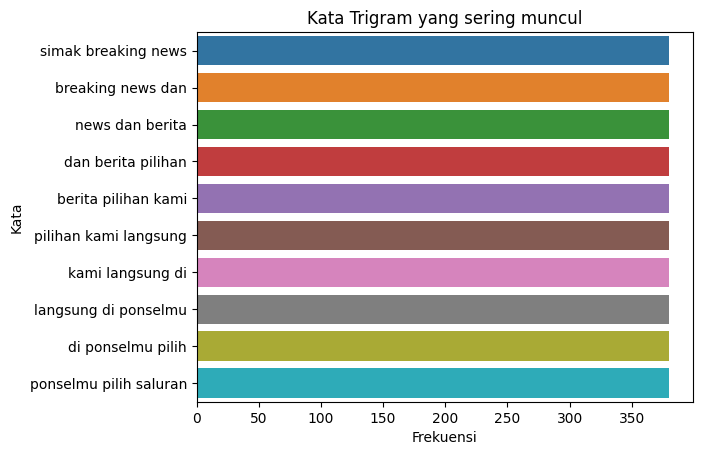

In [13]:
# cek n-gram frekuensi untuk trigram atau 3 kata
plot_top_ngrams_barchart(df['content'],3)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Kata Trigram yang sering muncul')

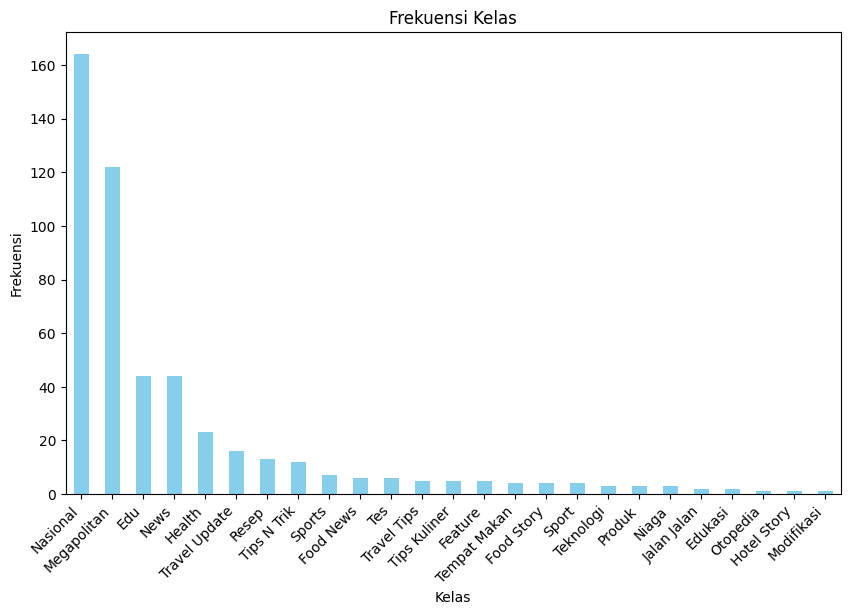

In [14]:
# Menghitung frekuensi masing-masing nilai dalam kolom 'kelas'
kelas_counts = df['kelas'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
kelas_counts.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

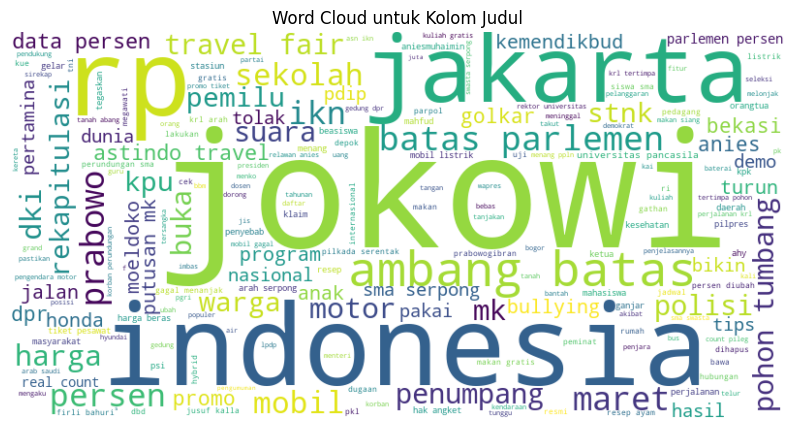

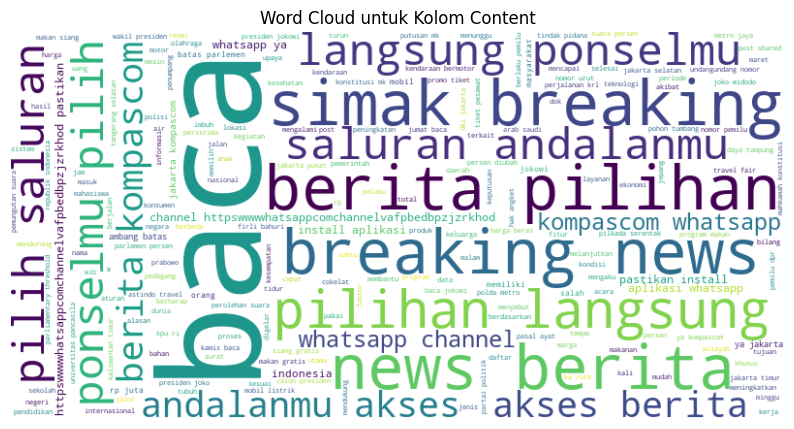

In [15]:
# Membuat Word Cloud untuk Judul dan Content
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import re

# Download corpus untuk stopwords bahasa Indonesia
# nltk.download('stopwords')

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words_indonesia = set(stopwords.words('indonesian'))

# Membuat fungsi untuk membersihkan teks dan menghapus stopwords
def clean_text(text):
    # Mengubah teks menjadi lowercase
    text = text.lower()
    # Menghapus karakter selain alphabet
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Menghapus stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words_indonesia)
    return text

# Membersihkan dan menghapus stopwords dari kolom judul dan content
df['judul_clean'] = df['judul'].apply(clean_text)
df['content_clean'] = df['content'].apply(clean_text)

# Membuat word cloud untuk kolom judul yang telah dibersihkan
judul_text = ' '.join(df['judul_clean'])
wordcloud_judul = WordCloud(width=800, height=400, background_color='white').generate(judul_text)

# Menampilkan word cloud untuk kolom judul
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_judul, interpolation='bilinear')
plt.title('Word Cloud untuk Kolom Judul')
plt.axis('off')
plt.show()

# Membuat word cloud untuk kolom content yang telah dibersihkan
content_text = ' '.join(df['content_clean'])
wordcloud_content = WordCloud(width=800, height=400, background_color='white').generate(content_text)

# Menampilkan word cloud untuk kolom content
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.title('Word Cloud untuk Kolom Content')
plt.axis('off')
plt.show()

